<div style="text-align: right"> <b>[M1 info ML] Réduction de dimensions - 2020/2021</b> </div>
<div style="text-align: right"> <b>TDTP2</b> </div>
<div style="text-align: right"> <a href="mailto:mohamed.maouche@univ-lille.fr"> M. Maouche </a> </div>



# Génération de datasets

Dans un premier temps l'objectif de ce TP est de vous familiariser avec les outils python afin de créer des jeux de données synthétiques qui vous permettent d’investiguer les avantages et inconvénients des méthodes de réduction de dimensions.

Attention : Dans toute la suite du TP faites en sorte d'avoir une variable global ```npoints=1000``` pour pouvoir modifier le nombre de points générer de tout les datasets générés en une fois.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_s_curve,make_circles
from sklearn.decomposition import PCA,KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE,SpectralEmbedding
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import load_digits
from time import time

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

npoints=1000

## Familiarisation avec ```sklearn.datasets```

Vous trouverez dans [sklearn.datasets](https://scikit-learn.org/stable/datasets.html#datasets), un ensemble d'outils et de fonctions vous permettant de charger des datasets réels populaires mais aussi pour la création de dataset avec des formats particuliers. 

1 - Utilisez ```from sklearn.datasets import make_circles``` pour construire un exemple similaire à la figure en dessous (2 classes).
![circles](img/circles.png)

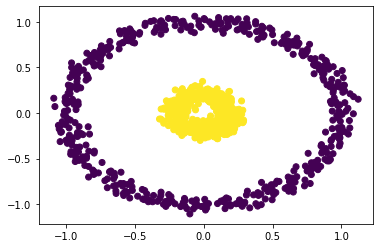

In [2]:
X_circle,y_circle = make_circles(npoints,noise=.05,factor=.2)

plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle)

plt.savefig("make_circles")

2 - Utilisez ```from sklearn.datasets import make_moons``` pour construire un exemple similaire à la figure en dessous (2 classes).
![Moons](img/moons.png)

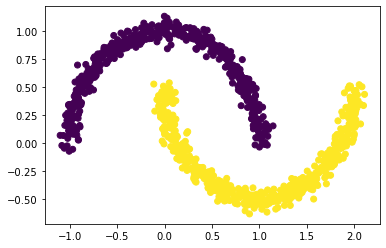

In [3]:
X_moon,y_moon = make_moons(npoints,noise=0.05)

plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon)
plt.savefig("make_moons")

3 - Utilisez ```from sklearn.datasets import make_s_curve``` pour construire un exemple similaire à la figure en dessous (aucune classe).

Info : Pour faire des figures 3D, pensez à ``` ax = plt.axes(projection='3d')```.
![scurve](img/scurve.png)

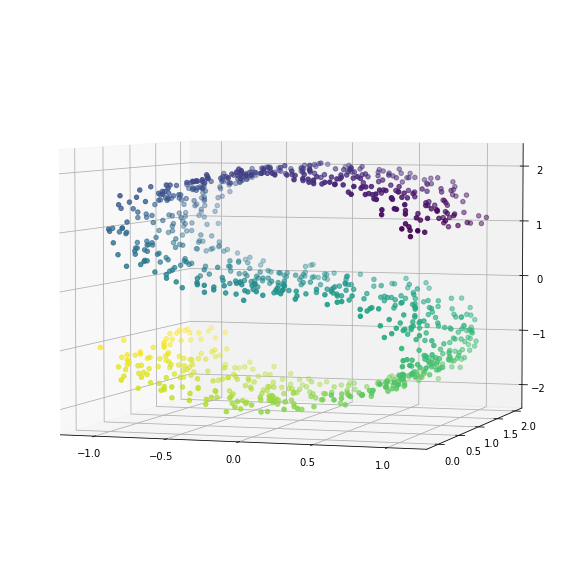

In [4]:
X_curve, y_curve = make_s_curve(npoints,noise=.05)

fig = plt.figure(figsize=(15, 8), constrained_layout=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(X_curve[:,0],X_curve[:,1],X_curve[:,2],c=y_curve)
ax.view_init(4, -72)
plt.savefig("make_s_curve_1")

4 - Reprenez vos données en forme de  S-curve pour construire un exemple similaire à la figure en dessous mais divisez le dataset en 3 classes.
![scurve3](img/scurve_3classes.png)

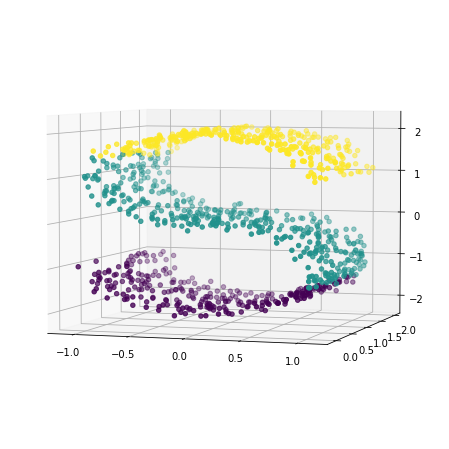

In [5]:
y_curve2 = y_curve
y_curve2 = np.where(y_curve > 2,0,y_curve2)
y_curve2 = np.where(y_curve < -2,2,y_curve2)
y_curve2 = np.where(y_curve == y_curve2,1,y_curve2)
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(projection='3d')
ax.scatter(X_curve[:,0],X_curve[:,1],X_curve[:,2],c=y_curve2)
ax.view_init(4, -72)
plt.savefig("make_s_curve_2")

In [6]:
def s_curve_datasets(npoints,noise=.05):
    X_curve, y_curve = make_s_curve(npoints,noise=noise)
    y_curve2 = y_curve
    y_curve2 = np.where(y_curve > 2,0,y_curve2)
    y_curve2 = np.where(y_curve < -2,2,y_curve2)
    y_curve2 = np.where(y_curve == y_curve2,1,y_curve2)
    return X_curve,y_curve2

5 - Une autre forme bien  connu est le swiss roll à créer avec ```from sklearn.datasets import make_swiss_roll```
Produisez donc la forme ci-dessous (en créant 3 classes avec).
![swiss](img/swiss.png)
![swiss3](img/swiss_3classes.png)

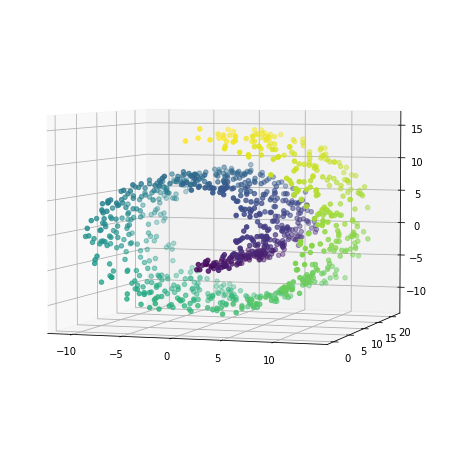

In [7]:
X_roll, y_roll = make_swiss_roll(npoints,noise=0.5)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_roll[:,0],X_roll[:,1],X_roll[:,2],c=y_roll)
ax.view_init(4, -72)
plt.savefig("swill_roll_1")

In [8]:
def swill_roll_discret(npoints,noise=.05):
    X_roll, y_roll = make_swiss_roll(npoints,noise=noise)

    y_roll2 = y_roll
    y_roll2 = np.where(y_roll > 11,0,y_roll2)
    y_roll2 = np.where(y_roll < 8,2,y_roll2)
    y_roll2 = np.where(y_roll == y_roll2,1,y_roll2)
    return X_roll,y_roll2

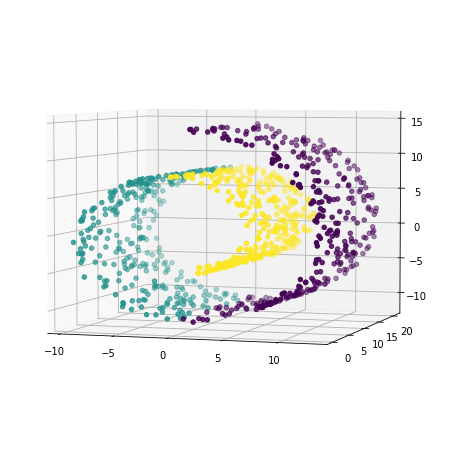

In [9]:
X_roll, y_roll = swill_roll_discret(npoints)

fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(projection='3d')
ax.scatter(X_roll[:,0],X_roll[:,1],X_roll[:,2],c=y_roll)
ax.view_init(4, -72)

plt.savefig("swill_roll_2")

## Générer nos propres exemples
Nous pouvons aussi créer des formes intéressantes

6 - Construisez la figure "grille" ci-dessous.
![grille](img/grille.png) ![grille3](img/grille_3classes.png)


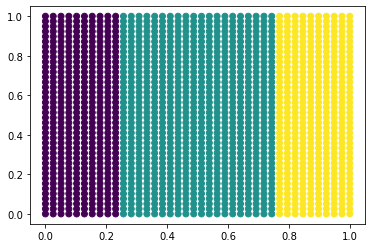

In [10]:
X_grid = np.array([[x,y] for x in np.linspace(0,1,40) for y in np.linspace(0,1,40)]).reshape(40*40,2)

y_grid = X_grid[:,0]
y_grid = np.where(y_grid<= 0.25,0,y_grid)
y_grid = np.where(y_grid>= 0.75,2,y_grid)
y_grid = np.where(np.logical_and(y_grid > 0.25,y_grid < 0.75),1,y_grid)

plt.scatter(X_grid[:,0],X_grid[:,1],c=y_grid)
plt.savefig("grid1")

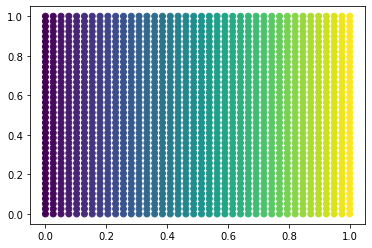

In [11]:
X_grid = np.array([[x,y] for x in np.linspace(0,1,40) for y in np.linspace(0,1,40)]).reshape(40*40,2)
plt.scatter(X_grid[:,0],X_grid[:,1],c=X_grid[:,0])
plt.savefig("grid2")

In [12]:
def grid_datasets():
    X_grid = np.array([[x,y] for x in np.linspace(0,1,40) for y in np.linspace(0,1,40)]).reshape(40*40,2)
    return X_grid,X_grid[:,0]

def grid_datasets_sep():
    X_grid = np.array([[x,y] for x in np.linspace(0,1,40) for y in np.linspace(0,1,40)]).reshape(40*40,2)

    y_grid = X_grid[:,0]
    y_grid = np.where(y_grid<= 0.25,0,y_grid)
    y_grid = np.where(y_grid>= 0.75,2,y_grid)
    y_grid = np.where(np.logical_and(y_grid > 0.25,y_grid < 0.75),1,y_grid)
    return X_grid,y_grid

7 - Construisez la figure "sphere" ci-dessous.

Conseil : avec des coordonées polaires c'est très facile !
![sphere](img/sphere.png) ![sphere3](img/sphere_3classes.png)


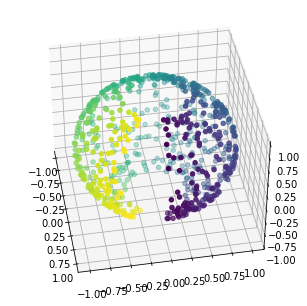

In [13]:
from sklearn.utils import check_random_state

def grid_sphere(n_samples):
    random_state = check_random_state(0)
    p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
    t = random_state.rand(n_samples) * np.pi

    # Sever the poles from the sphere.
    indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
    colors = p[indices]
    x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
        np.sin(t[indices]) * np.sin(p[indices]), \
        np.cos(t[indices])
    return np.array([x, y, z]).T,p[indices]


X,y = grid_sphere(npoints)
fig = plt.figure(figsize=(30, 16))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(40, -10)

plt.savefig("sphere1", bbox_inches='tight')

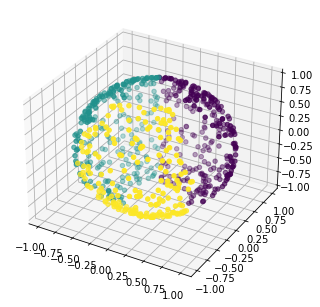

In [14]:
def grid_sphere_discret(n_samples):
    random_state = check_random_state(0)
    p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
    t = random_state.rand(n_samples) * np.pi

    # Sever the poles from the sphere.
    indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
    colors = p[indices]
    x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
        np.sin(t[indices]) * np.sin(p[indices]), \
        np.cos(t[indices])

    y_grid = p[indices]
    y_grid = np.where(y_grid<= 2,0,y_grid)
    y_grid = np.where(y_grid>= 4,2,y_grid)
    y_grid = np.where(np.logical_and(y_grid > 2,y_grid < 4),1,y_grid)
    return np.array([x, y, z]).T,y_grid

X,y = grid_sphere_discret(npoints)
fig = plt.figure(figsize=(30, 16))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
#ax.view_init(40, -10)


plt.savefig("sphere2", bbox_inches='tight')

##  Datasets réels

In [15]:
## Je remercie les auteurs de ces fonctions:
#          Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import datasets

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

([], [])

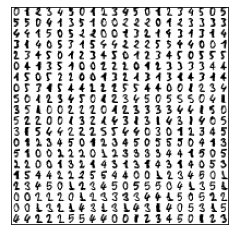

In [16]:
# ----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])


Vous trouverez ci-dessous une fonction permettant d'afficher le dataset digits avec des annotations pour repérer les différents chiffres.

In [35]:
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X,y,digits, out_file, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    return plt

Dans la figure ci-dessous on applique cette fonction pour dessiner une projection fictive aléatoire de digits.

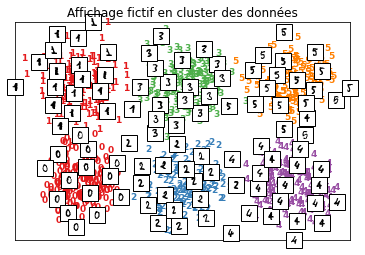

In [18]:
std = 0.2
newU =np.vstack((y//2 , y%2)).T
arr = newU + std * np.random.randn(newU.shape[0],newU.shape[1])
plot_embedding(arr,y,digits,"Affichage fictif en cluster des données")

In [64]:
def plot_digits(nb_class, out_file):
    digits = datasets.load_digits(n_class=nb_class)
    X = digits.data
    y = digits.target
    n_samples, n_features = X.shape
    std = 0.2
    newU =np.vstack((y//2 , y%2)).T
    arr = newU + std * np.random.randn(newU.shape[0],newU.shape[1])
    plt = plot_embedding(arr,y,digits,"Affichage fictif en cluster des données")
    plt.savefig(out_file)

# Visualisation des effets des méthodes de réduction de dimensions

8 - Servez vous des methodes ```PCA```, ```KPCA```, ```LDA```,```TSNE``` sur l'ensemble des datasets précédents (i.e., Cercle, Lune, S-curve, Swiss-roll, Grille, Sphere et Digits) pour avoir une nouvelle représentation 2D et/ou 1D. 
Discutez les différents cas.

In [22]:
from sklearn.datasets import load_iris

real_datasets = {
    "digits_all":load_digits(n_class=10,return_X_y=True),
    "digits_6":load_digits(n_class=6,return_X_y=True),
    "digits_4":load_digits(n_class=4,return_X_y=True),
    "iris":load_iris(return_X_y=True)
}

gen_datasets = {
    "cercle":make_circles(npoints,noise=.05,factor=.2),
    "moon":make_moons(npoints,noise=0.05),
    "curve":make_s_curve(npoints,noise=.05),
    "curve discret":s_curve_datasets(npoints,noise=.05),
    "swiss roll":make_swiss_roll(npoints,noise=.05),
    "swiss roll discret":swill_roll_discret(npoints),
    "grid":grid_datasets(),
    "grid discret":grid_datasets_sep(),
    "sphere":grid_sphere(npoints),
    "sphere discret":grid_sphere_discret(npoints)
}

methods_2 = [
    PCA(n_components=2),
    #KernelPCA(n_components=2),
    LinearDiscriminantAnalysis(n_components=2),
    TSNE(n_components=2),
    SpectralEmbedding(n_components=2),
    SpectralEmbedding(affinity='rbf',n_components=2) # always last one !!
]

methods_1 = [
    PCA(n_components=1),
    #KernelPCA(n_components=1),
    LinearDiscriminantAnalysis(n_components=1),
    TSNE(n_components=1),
    SpectralEmbedding(n_components=1),
    SpectralEmbedding(affinity="rbf",n_components=1) # always last one !!
]

def process2(datasets, methods, output_name):
    figsize = figsize = (40, 32)
    rows = len(datasets)
    cols = len(methods)
    axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)

    exec_time = {}
    
    for index_rows,dataset in enumerate(datasets):
        X,y = datasets[dataset]
        exec_time[dataset] = {}

        for index_cols,method in enumerate(methods):
            try:
                t0 = time()
                X_bis = method.fit_transform(X,y)
                t1 = time()
                if index_cols == len(methods)-1:
                    exec_time[dataset]['SpectralEmbedding_rbf'] = t1 - t0
                else:
                    exec_time[dataset][method.__class__.__name__] = t1 - t0

                axs[index_rows,index_cols].scatter(X_bis[:,0],X_bis[:,1],c=y,label="(%.2g sec)" % (t1 - t0))
                axs[index_rows,index_cols].legend()
            except Exception as e:
                print("error: ", method.__class__.__name__)
                pass
        
    for ax, col in zip(axs[0], methods):
        ax.set_title(col.__class__.__name__)

    for ax, row in zip(axs[:,0], datasets):
        ax.set_ylabel(row, rotation=0, size='large')

    plt.savefig(output_name)
    
    return exec_time

    
def process1(datasets, methods, output_name):
    figsize = figsize = (40, 32)
    rows = len(datasets)
    cols = len(methods)
    axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)

    exec_time = {}
    
    for index_rows,dataset in enumerate(datasets):
        X,y = datasets[dataset]
        exec_time[dataset] = {}

        for index_cols,method in enumerate(methods):
            try:
                t0 = time()
                X_bis = method.fit_transform(X,y)
                t1 = time()
                if index_cols == len(methods)-1:
                    exec_time[dataset]['SpectralEmbedding_rbf'] = t1 - t0
                else:
                    exec_time[dataset][method.__class__.__name__] = t1 - t0
                    
                axs[index_rows,index_cols].scatter(X_bis, y, c=y, label="(%.2g sec)" % (t1 - t0))
                axs[index_rows,index_cols].legend()
            except Exception as e:
                print("error: ", method.__class__.__name__)
                pass
        
    for ax, col in zip(axs[0], methods):
        ax.set_title(col.__class__.__name__)

    for ax, row in zip(axs[:,0], datasets):
        ax.set_ylabel(row, rotation=0, size='large')

    plt.savefig(output_name)
    
    return exec_time

# 2 Components

error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis


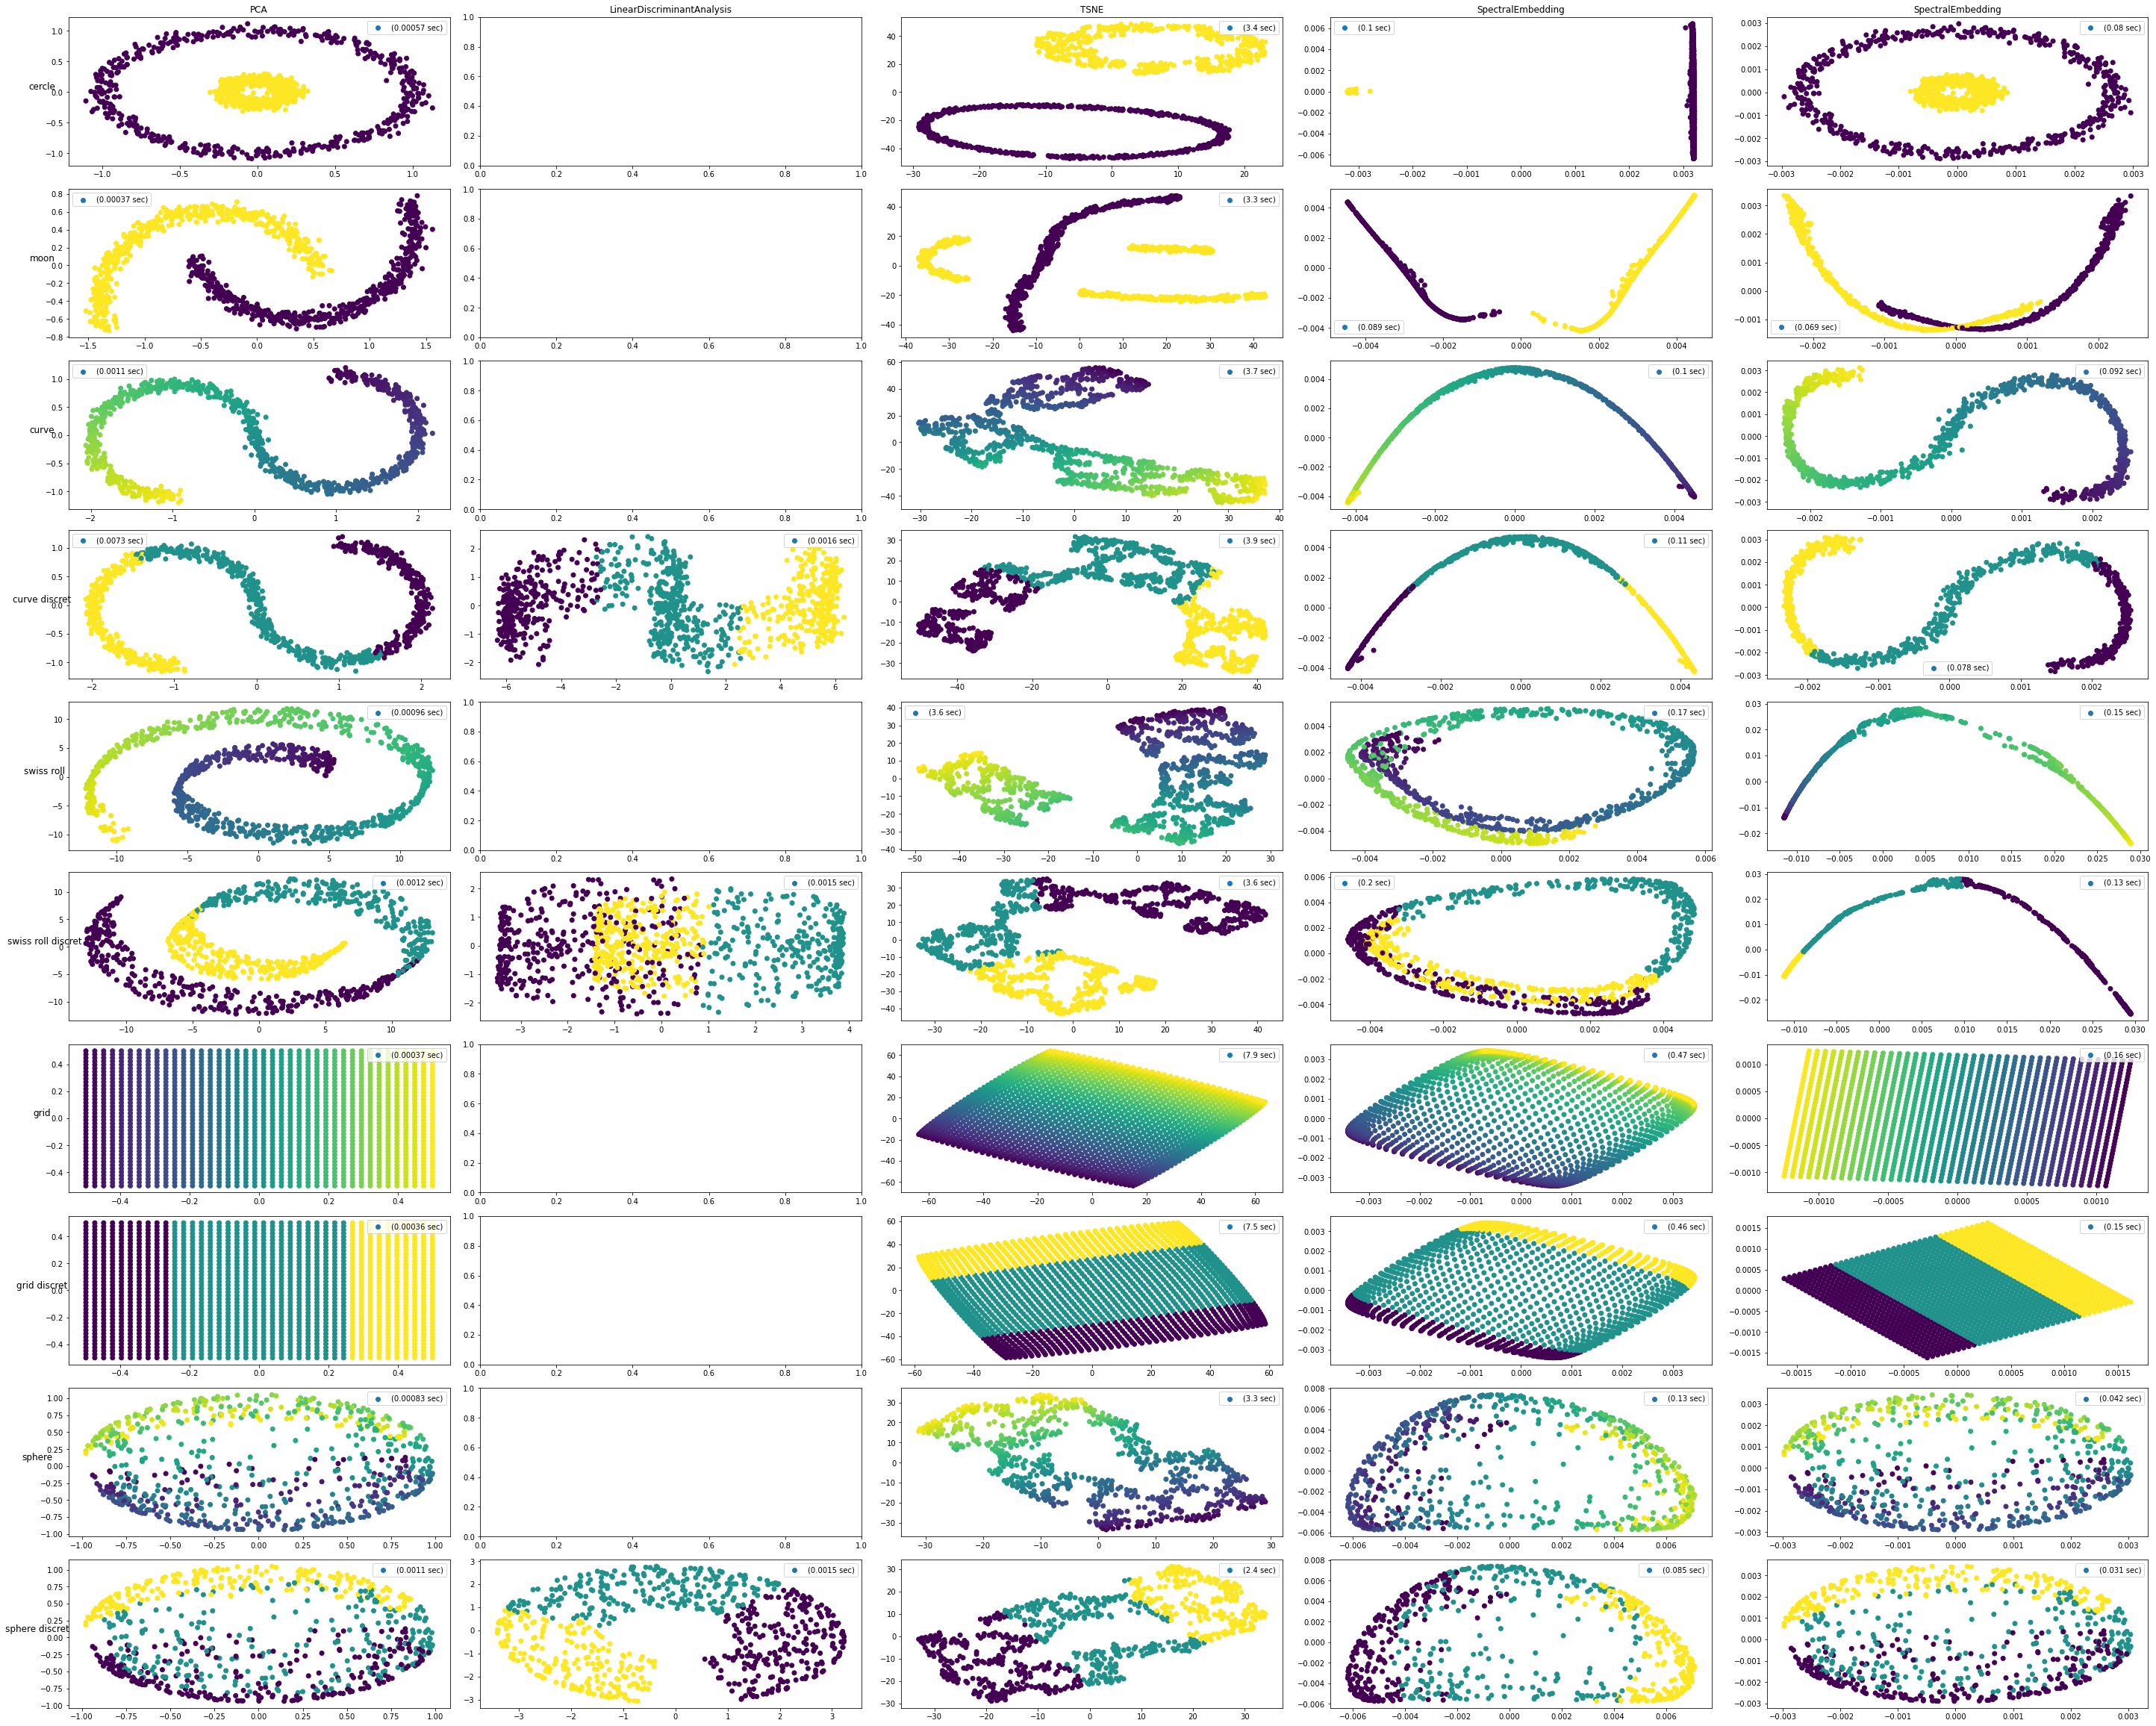

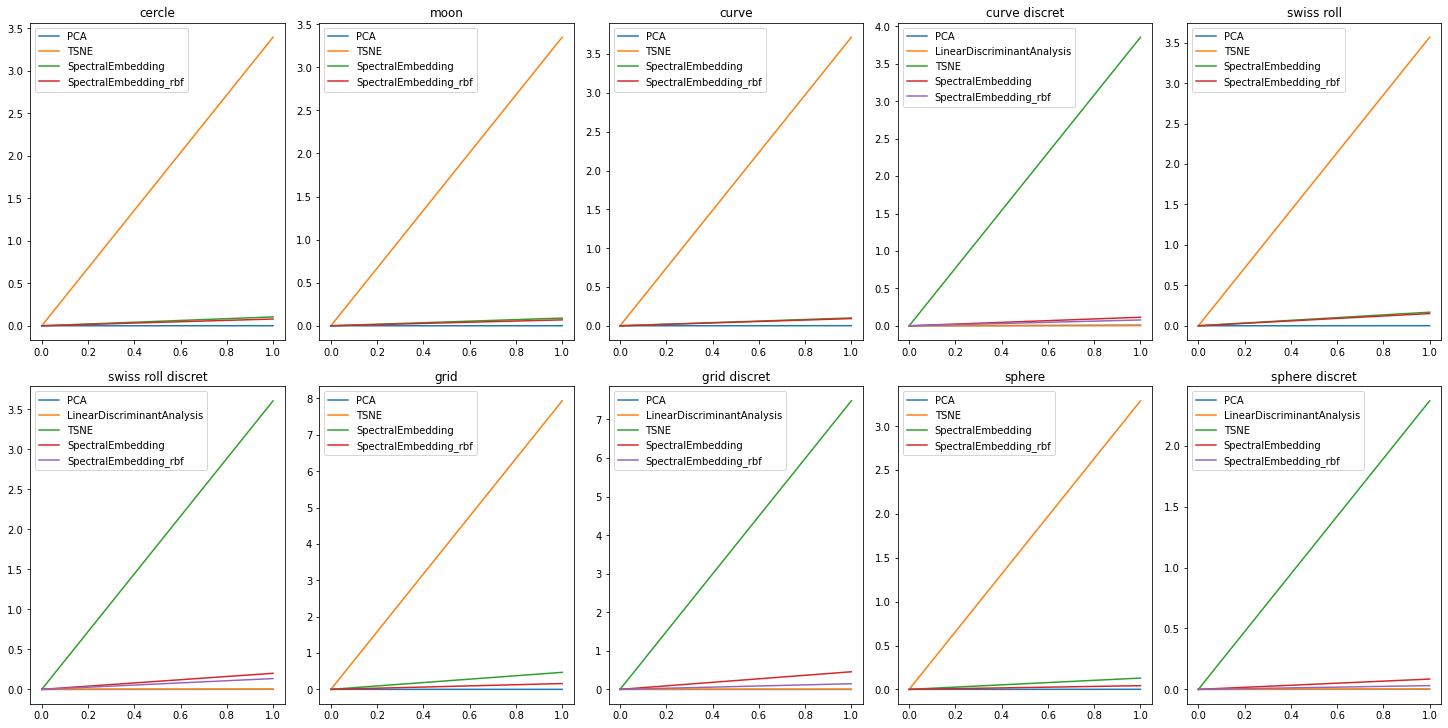

In [23]:
output_name = "gen_datasets_2"
exec_time = process2(gen_datasets, methods_2, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(2, 5)

i, j = 0, 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i,j].plot([0, exec_time[d][m]], label=m)
        axs[i,j].legend()
        axs[i,j].set_title(d)
        
    j += 1
    if j == 5:
        j = 0
        i = 1

plt.savefig(output_name+"_times")

On remarque que dans le cas (nombre de classe > nombre de components), l'utilisation du Lda est impossible ainsi que le cas des données aux étiquettes continues.  
Dans le cas ou les données possédent la même dimension en entrée quand sortie, KPCA et PCA conserve la forme de la donnée. Cependant ce n'est pas le cas pour TSNE, les données transformées sont devenu séparerable linéairement.  
Dans le cas des données ayant une dimension de plus, on remarque l'appariation de groupe l'un a conservé plus ou moins la forme de la donnée (PCA,KPCA) et l'autre non (LDA,TSNE).  
Dans le dataset digit, TSNE est le seul a nous donner des classes bien distaintes permettant une meilleur future classification.  
Le TSNE destructure la donnée pour mieux la regrouper à la différence de PCA et LDA qui conserve aux plus la donnée.  

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


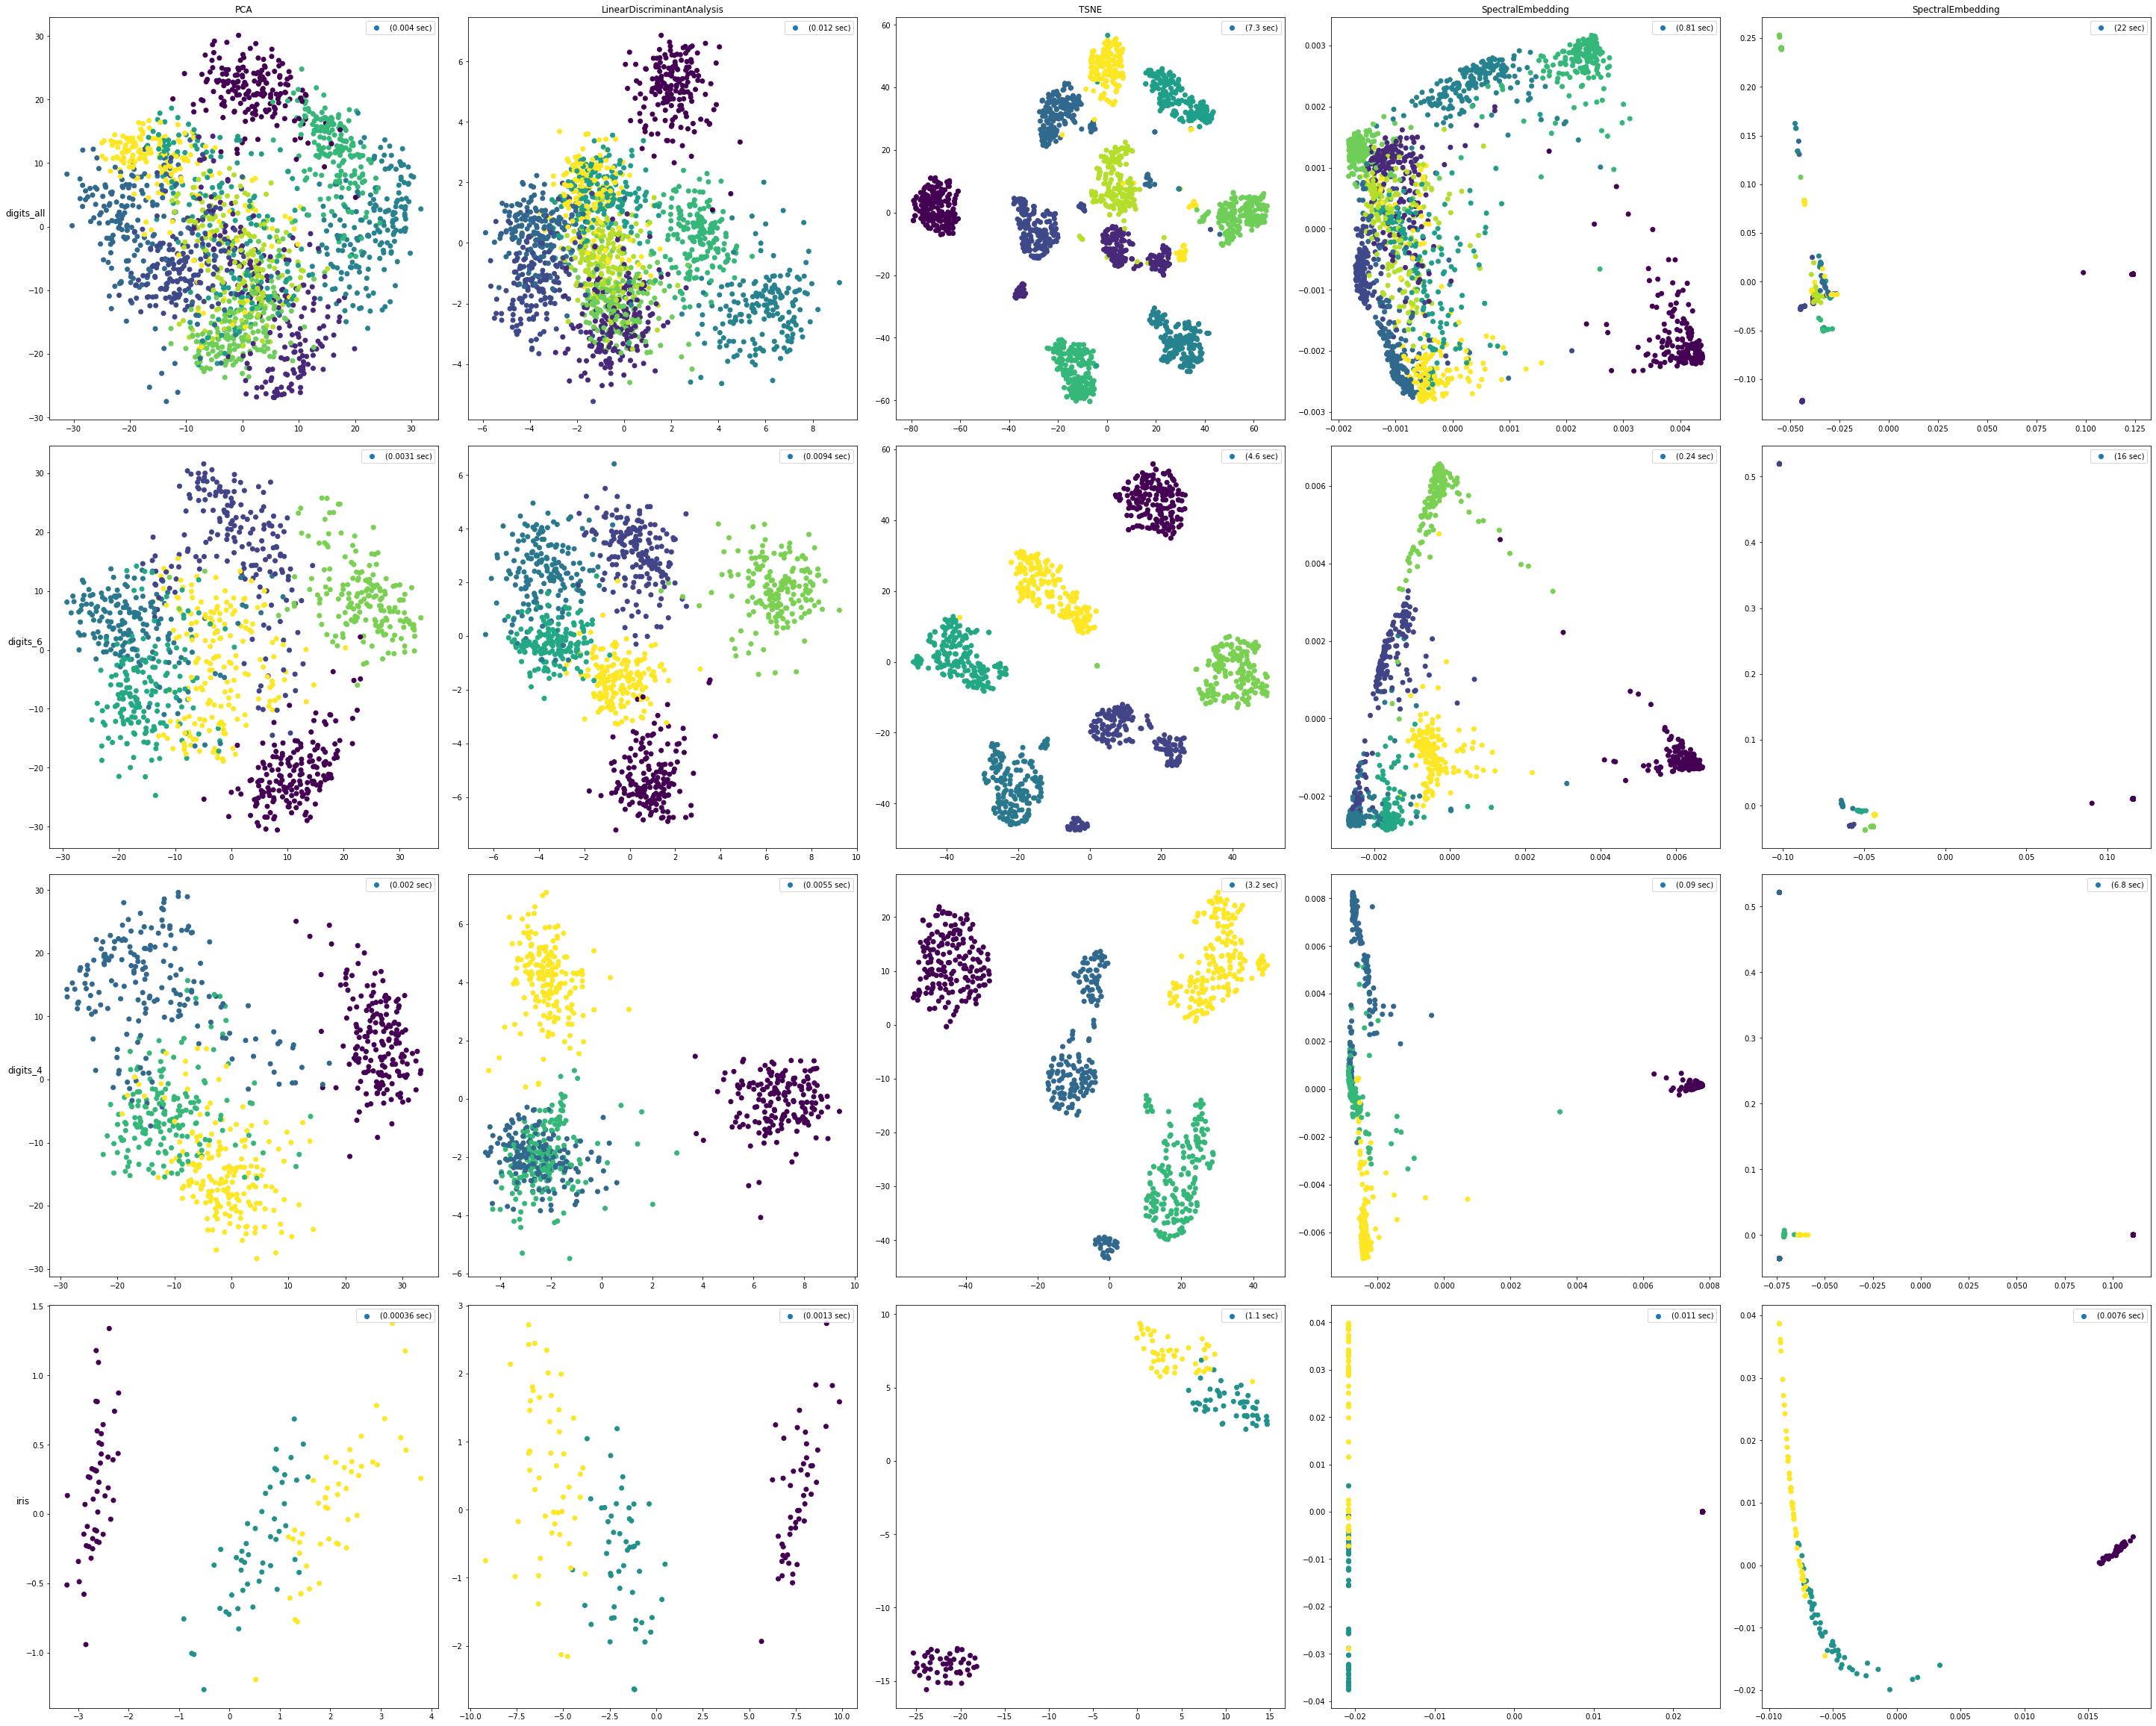

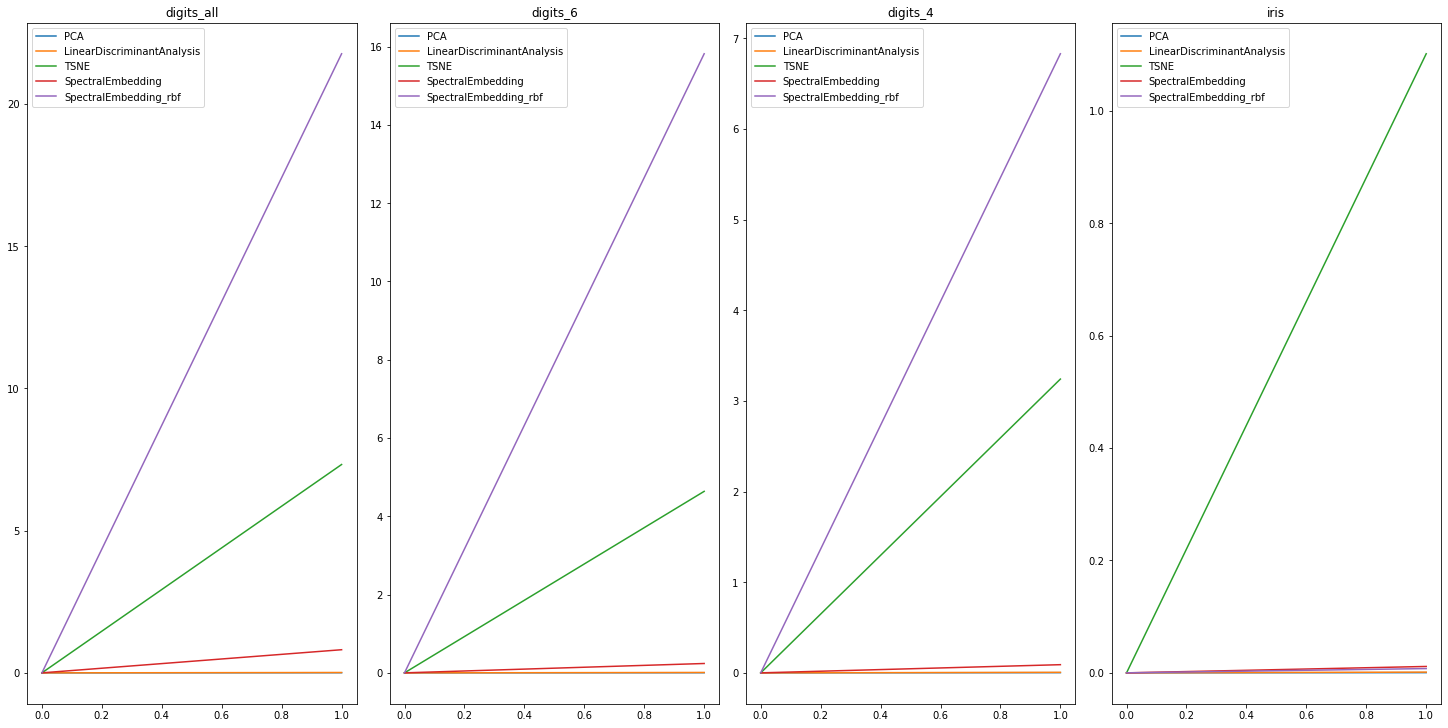

In [37]:
output_name = "real_datasets_2"
exec_time = process2(real_datasets, methods_2, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(1, len(real_datasets))

i = 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i].plot([0, exec_time[d][m]], label=m)
        axs[i].legend()
        axs[i].set_title(d)
        
    i += 1

plt.savefig(output_name+"_times")

# 1 Components

error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis


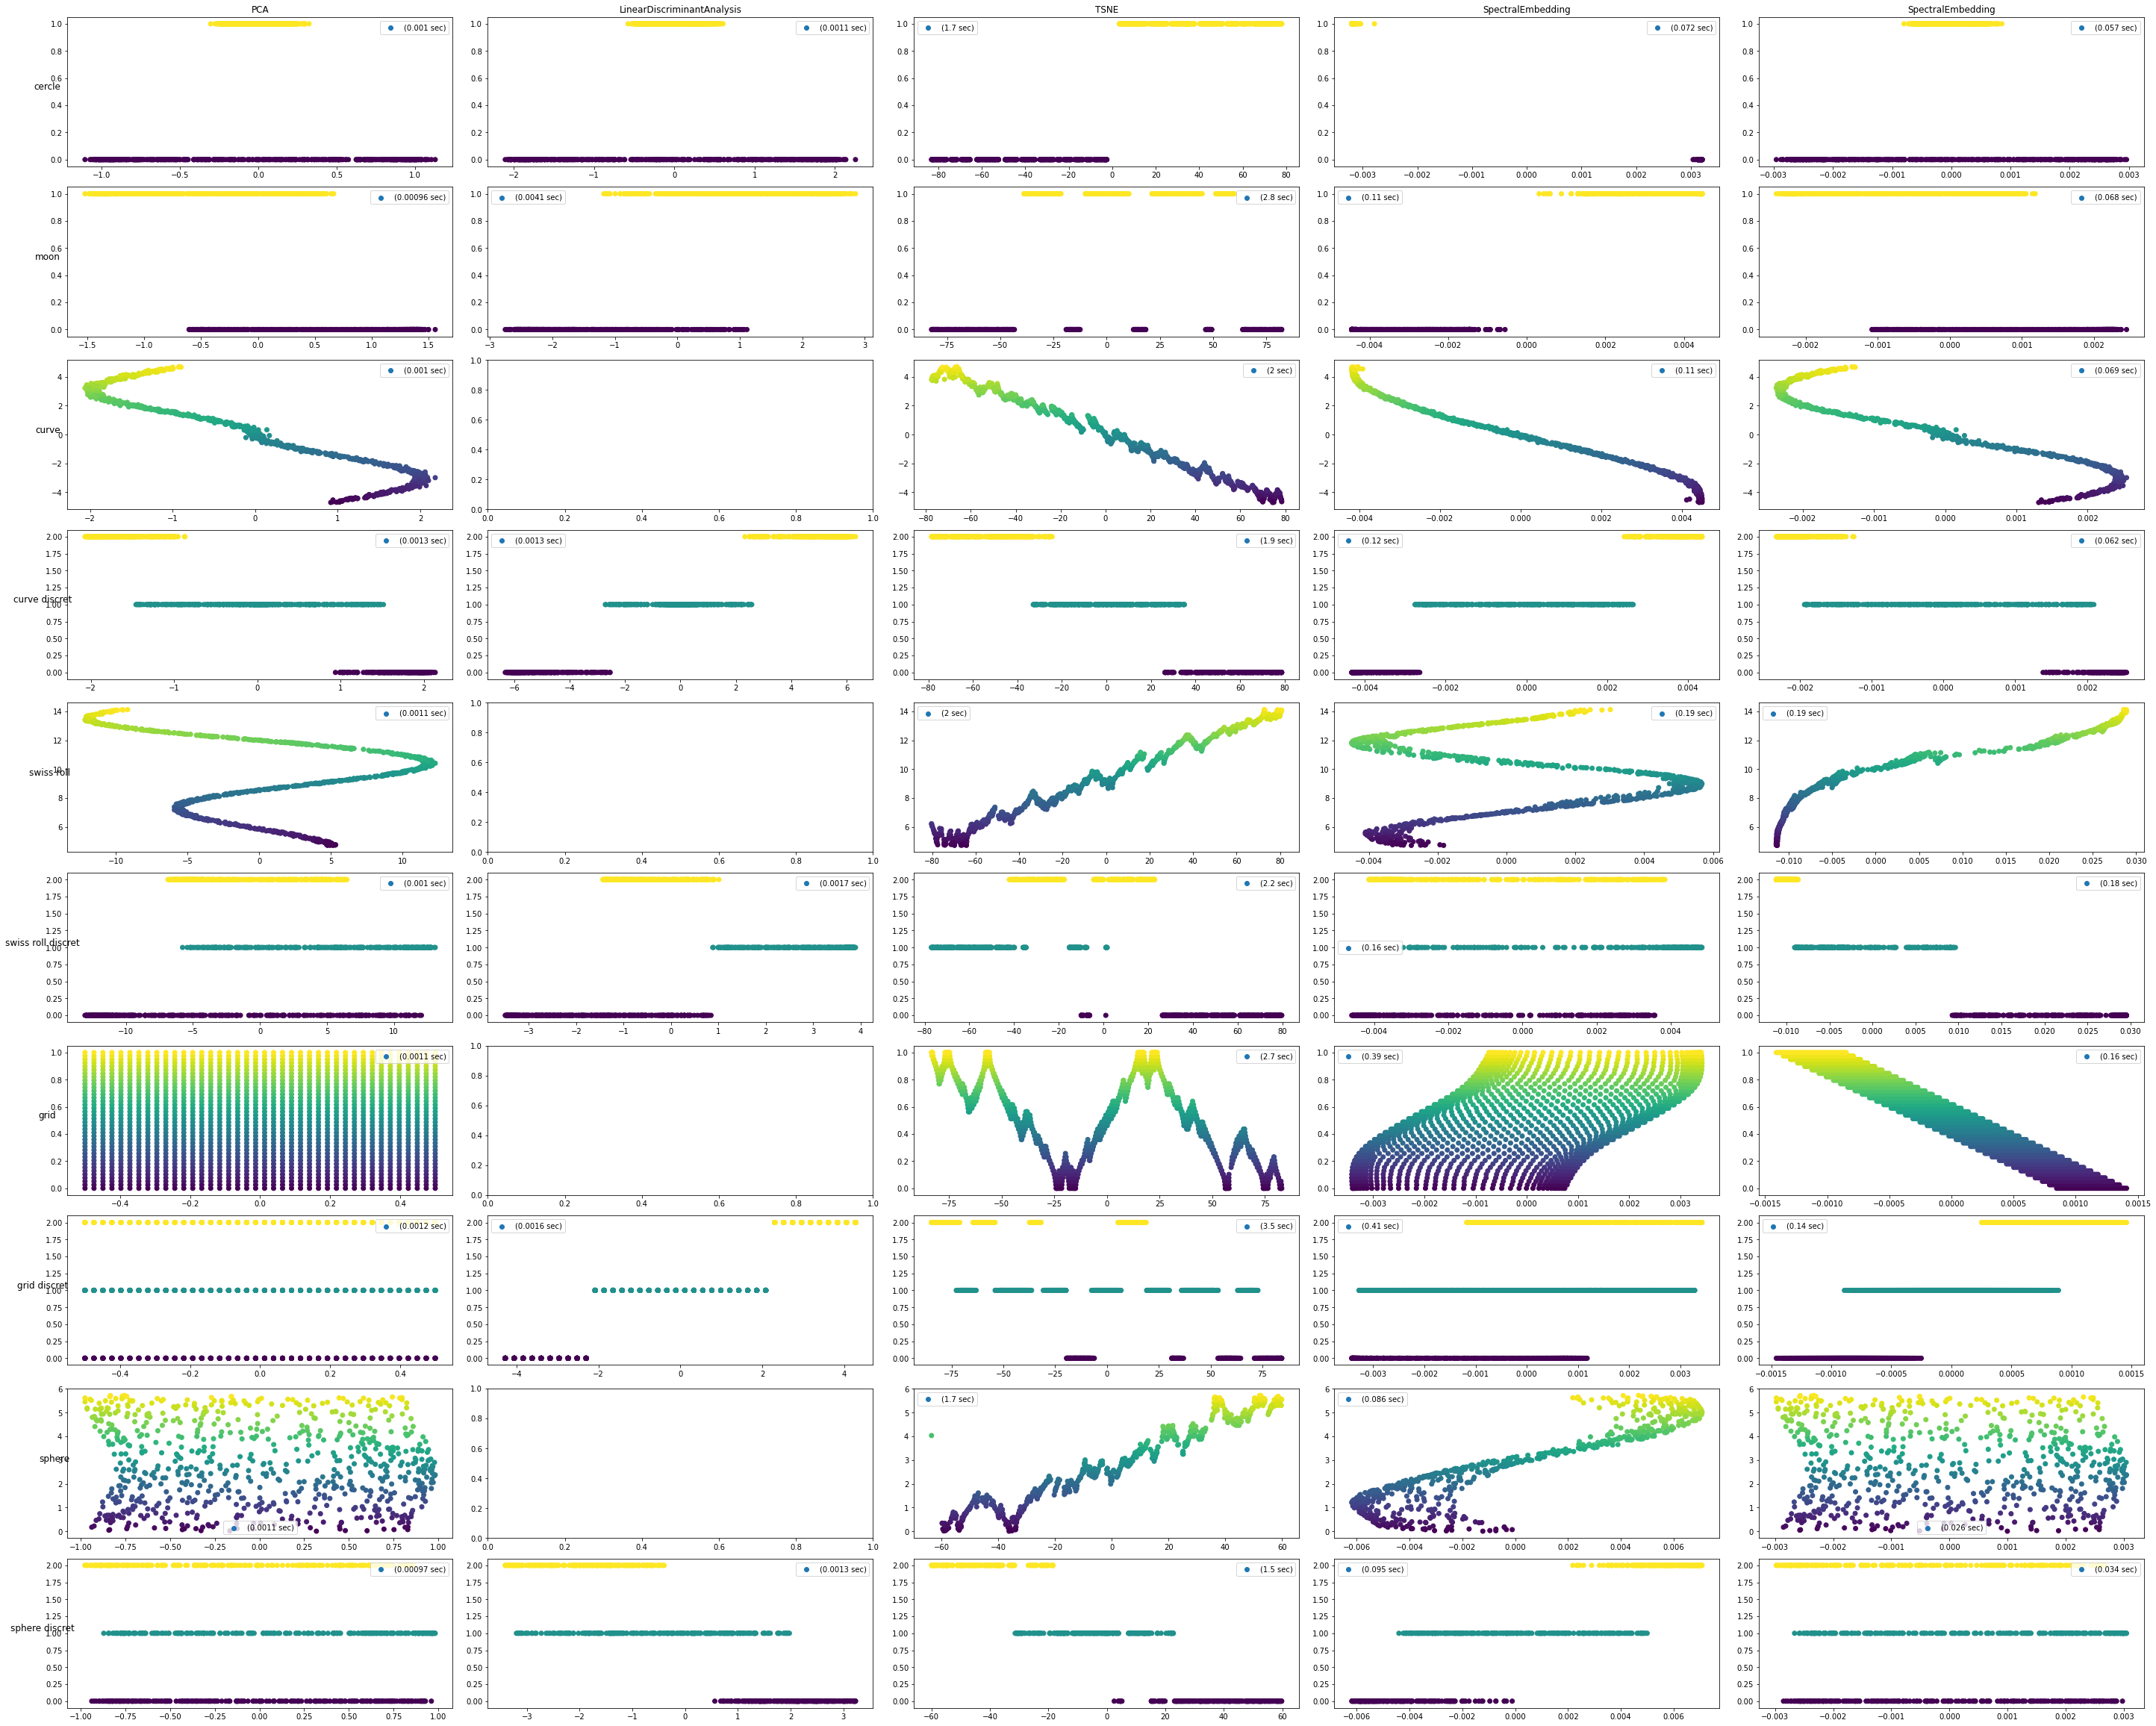

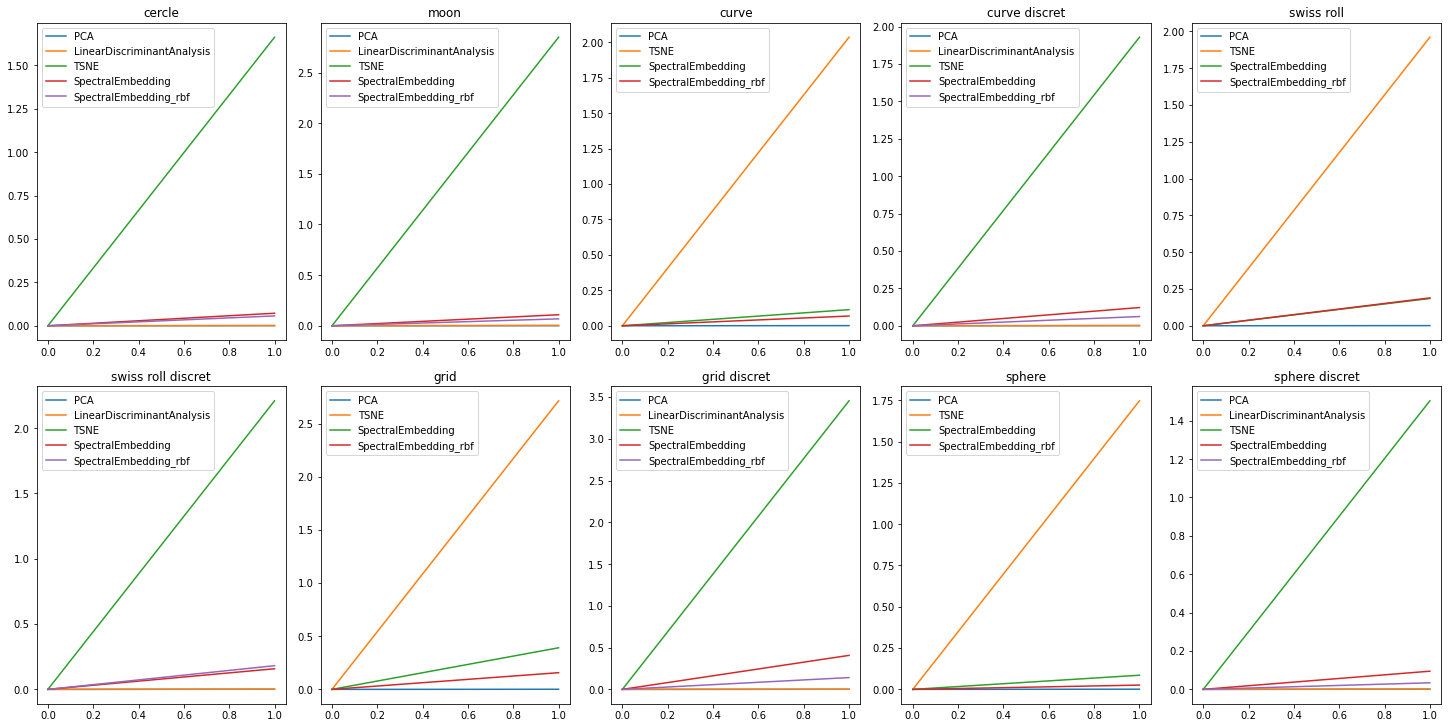

In [24]:
output_name = "gen_datasets_1"
exec_time = process1(gen_datasets, methods_1, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(2, 5)

i, j = 0, 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i,j].plot([0, exec_time[d][m]], label=m)
        axs[i,j].legend()
        axs[i,j].set_title(d)
        
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.savefig(output_name+"_times")

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


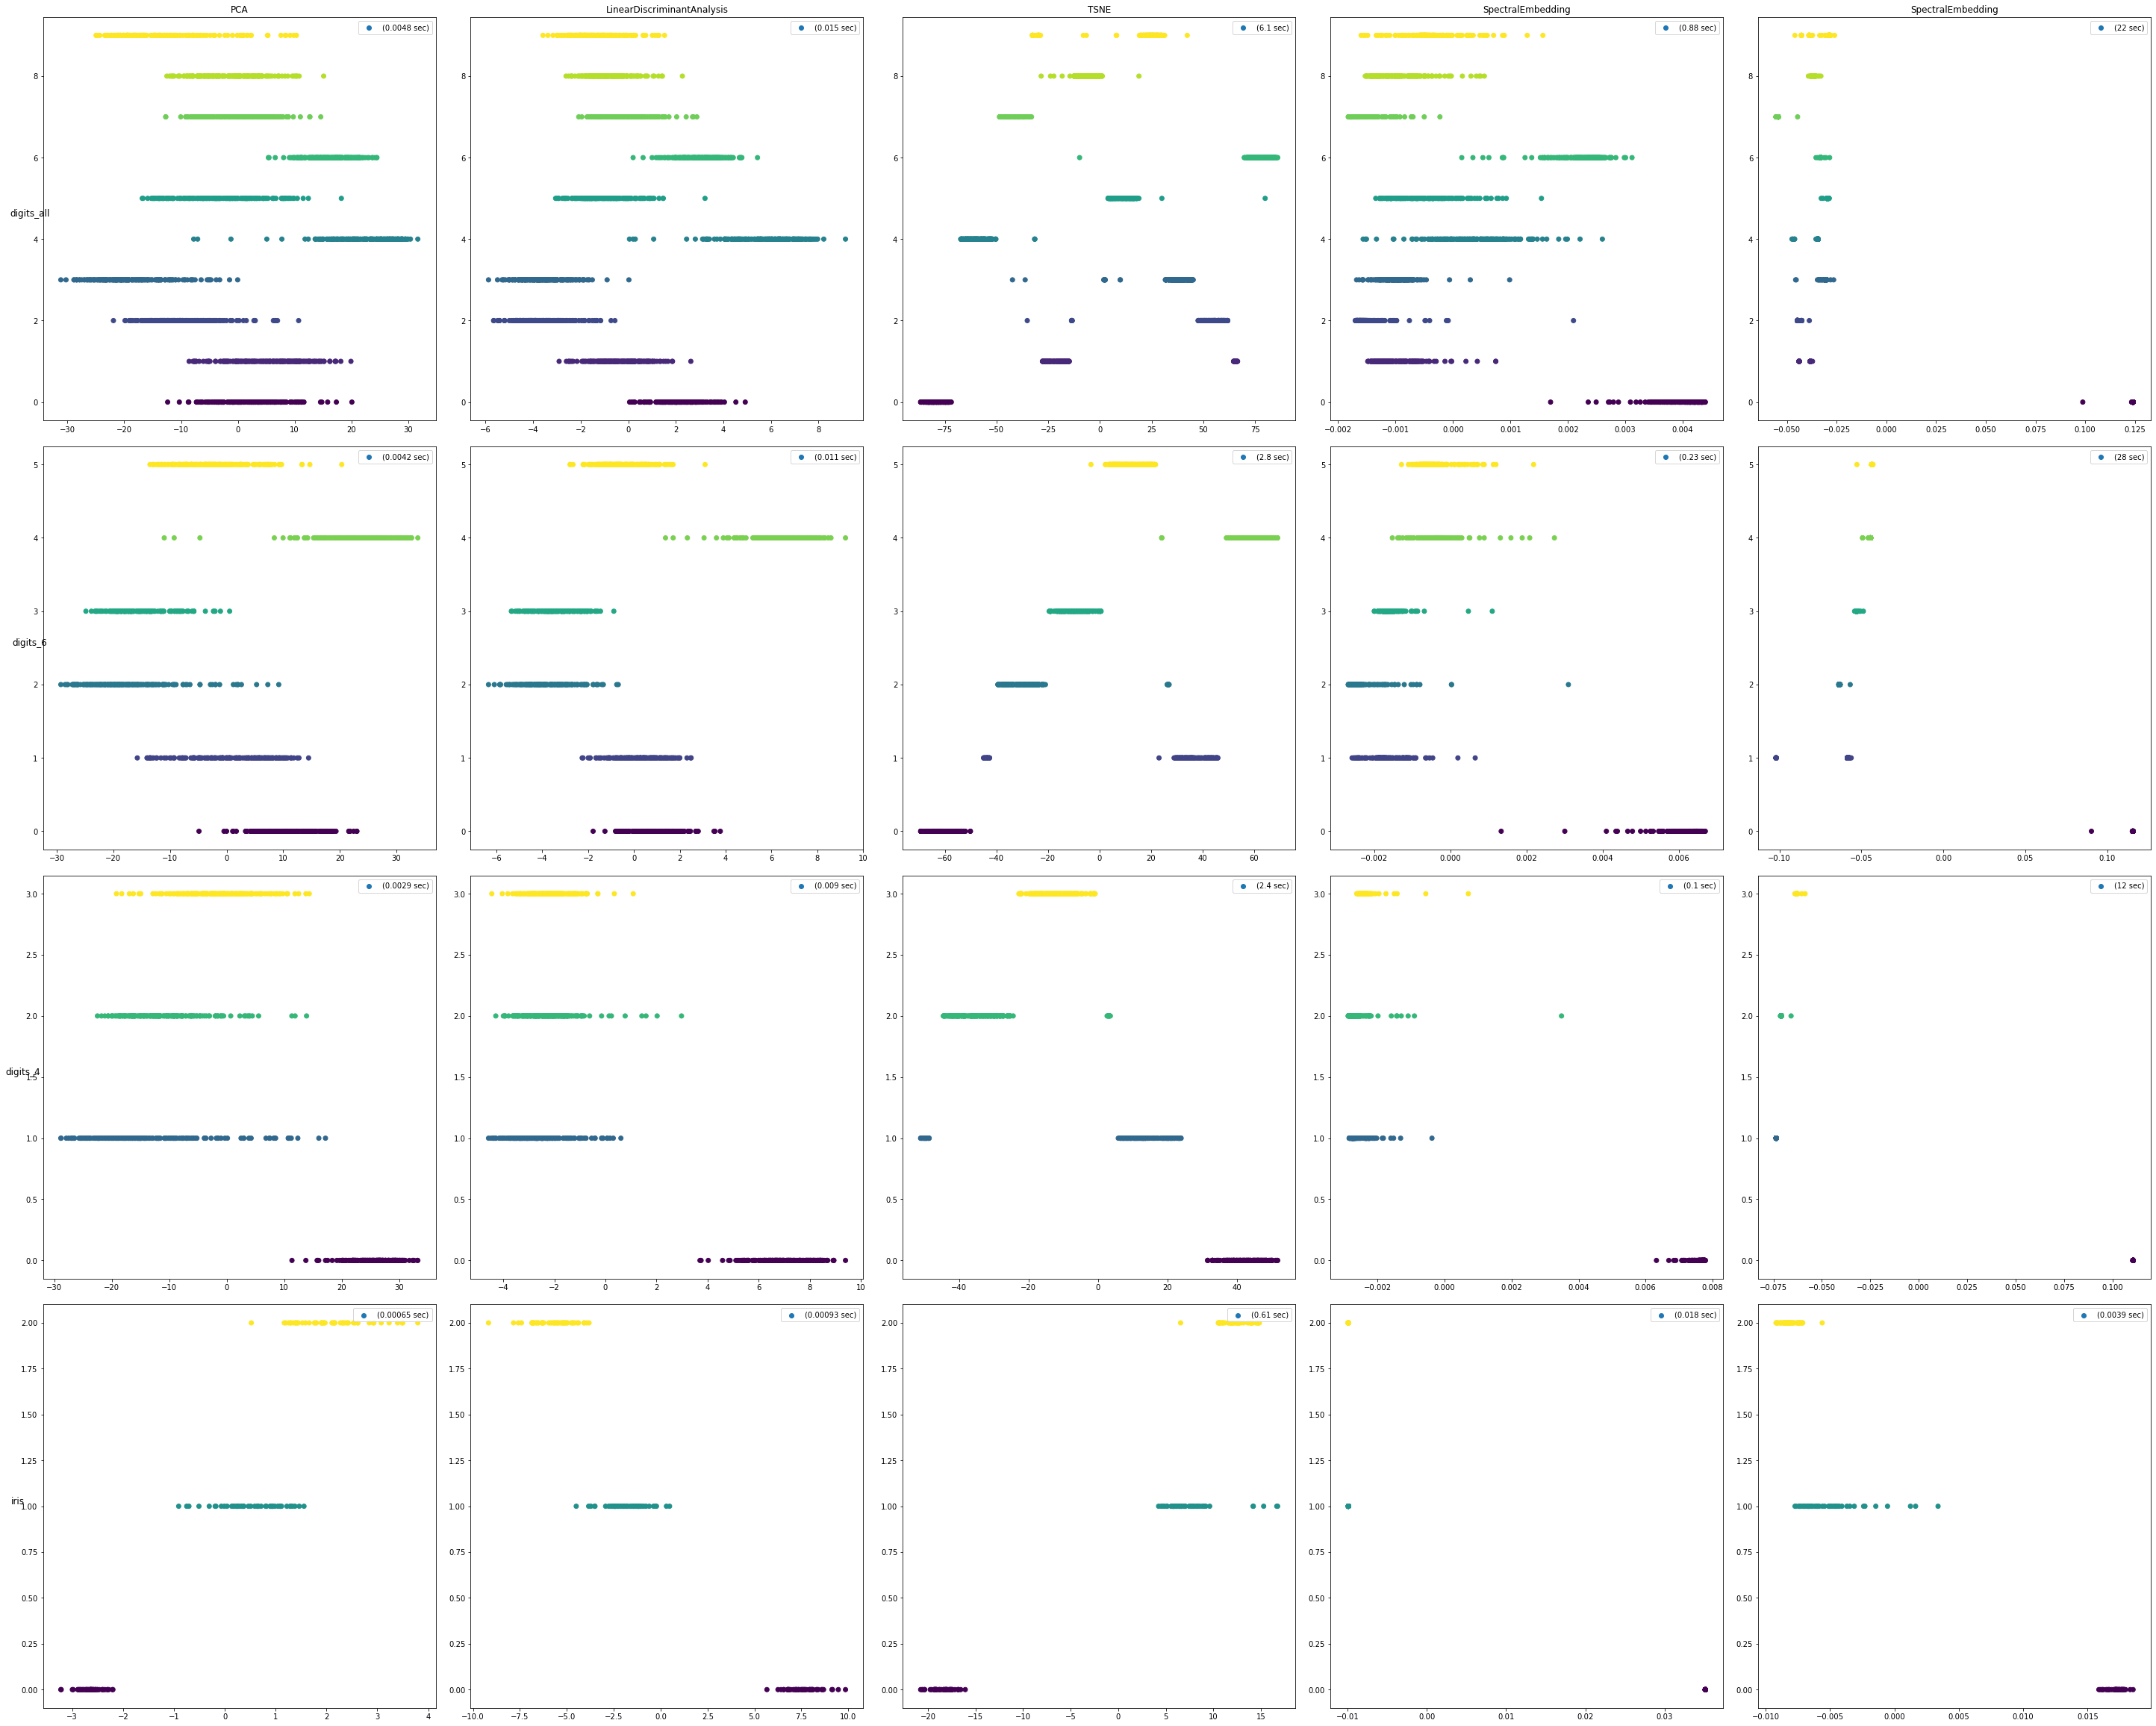

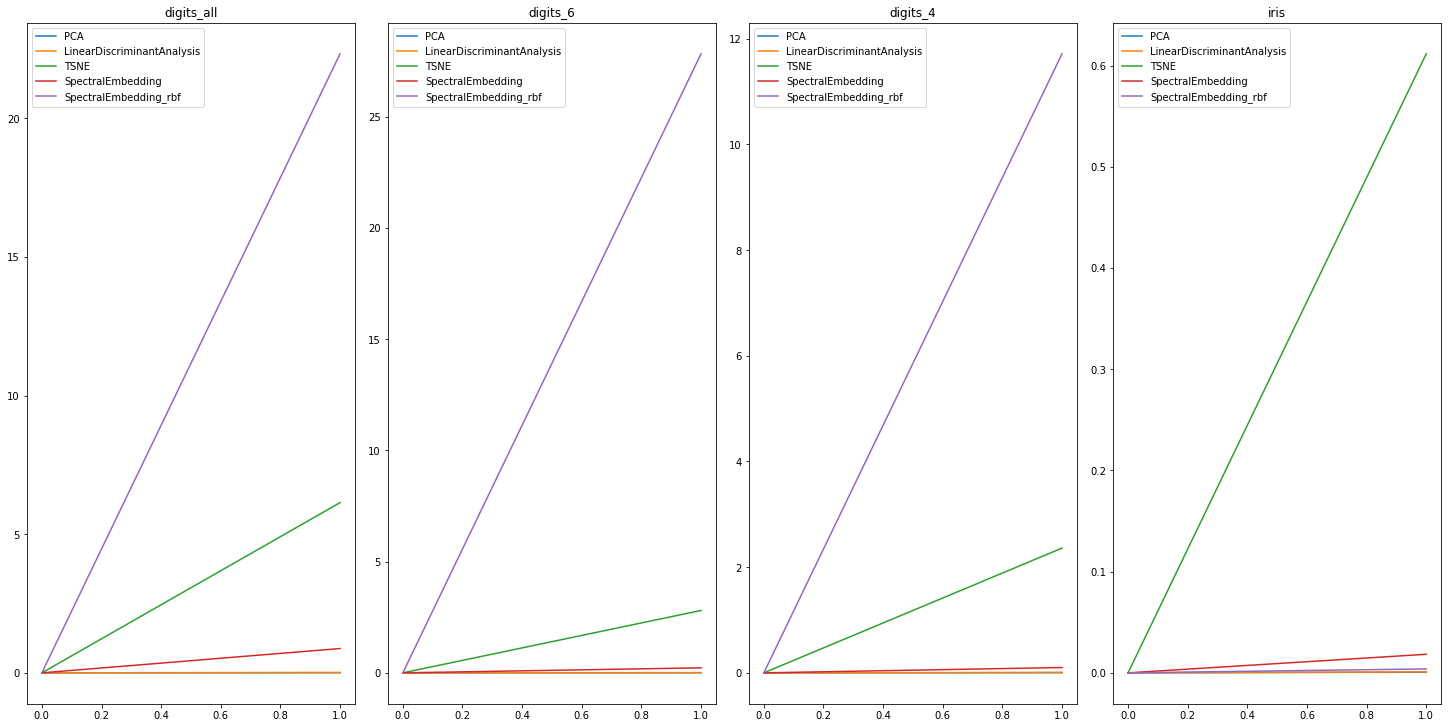

In [38]:
output_name = "real_datasets_1"
exec_time = process1(real_datasets, methods_1, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(1, len(real_datasets))

i = 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i].plot([0, exec_time[d][m]], label=m)
        axs[i].legend()
        axs[i].set_title(d)
        
    i += 1

plt.savefig(output_name+"_times")

On remarque que le cas de la conservation d'une seule componente et dans le cas où les labels ne sont pas continues, nous avons une séparation distainte de chaque classes.  
Abaisser la dimension des données, peut être une bonne pratique pour simplifier la classification et le clustering.  

# Evaluation

In [61]:
from sklearn.model_selection import cross_val_score

def evaluate(datasets, clfs):
    scores = {}
    
    for dataset in datasets:
        scores[dataset] = {}
                
        X,y = datasets[dataset]
        
        X = StandardScaler().fit_transform(X)
        
        print("dtatset: ", dataset)

        for _,clf in enumerate(clfs):
            try:  
                scores[dataset][clf] = cross_val_score(clfs[clf], X, y, cv=3).mean()
                print("  clf: ", clf, ", score: ", scores[dataset][clf])
                
            except Exception as e:
                print("error: ", clf, e)
                pass
    
    return scores

def red_evaluate(datasets, clfs, methods):
    scores = {}
    
    for dataset in datasets:
        X,y = datasets[dataset]
        scores[dataset] = {}
        
        print("dataset: ", dataset)
        for method in methods:
            print(" method: ", method)

            try:
                X_bis = method.fit_transform(X,y)
            except Exception as e:
                print("  reduction error: ", method, e)
                pass
            
            scores[dataset][method] = {}
            for clf in clfs:
                try:
                    scores[dataset][method][clf] = cross_val_score(clfs[clf], X_bis, y, cv=3).mean()
                    print("   clf: ", clf, ", score: ", scores[dataset][method][clf])       

                except Exception as e:
                    print("  clf error: ", clf, e)
                    pass    
    return scores
    

classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(3),
    'SVC_lin': SVC(kernel="linear", C=0.025),
    'SVC': SVC(gamma=2, C=1),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5),
    'RandomForestClassifier': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'MLPClassifier': MLPClassifier(alpha=1, max_iter=1000),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis()
}

In [57]:
gen_datasets_eval = {
    "cercle":make_circles(npoints,noise=.1,factor=.2),
    "moon":make_moons(npoints,noise=0.1),
    "curve discret":s_curve_datasets(npoints,noise=.1),
    "swiss roll discret":swill_roll_discret(npoints, noise=.1),
    "grid discret":grid_datasets_sep(),
    "sphere discret":grid_sphere_discret(npoints)
}

scores_gen = evaluate(gen_datasets_eval, classifiers)
scores_gen

dtatset:  cercle
  clf:  KNeighborsClassifier , score:  1.0
  clf:  SVC_lin , score:  0.5308661955368542
  clf:  SVC , score:  1.0
  clf:  DecisionTreeClassifier , score:  0.9910119700538861
  clf:  RandomForestClassifier , score:  0.994994994994995
  clf:  MLPClassifier , score:  1.0
  clf:  AdaBoostClassifier , score:  0.99499799200398
  clf:  GaussianNB , score:  0.984996973020925
  clf:  QuadraticDiscriminantAnalysis , score:  0.985994977012941
dtatset:  moon
  clf:  KNeighborsClassifier , score:  1.0
  clf:  SVC_lin , score:  0.872983762205319
  clf:  SVC , score:  1.0
  clf:  DecisionTreeClassifier , score:  0.9830039620458783
  clf:  RandomForestClassifier , score:  0.9769919620219021
  clf:  MLPClassifier , score:  0.9629869390348432
  clf:  AdaBoostClassifier , score:  0.9869989750229271
  clf:  GaussianNB , score:  0.878983774193355
  clf:  QuadraticDiscriminantAnalysis , score:  0.878983774193355
dtatset:  curve discret
  clf:  KNeighborsClassifier , score:  0.97400094705483

{'cercle': {'KNeighborsClassifier': 1.0,
  'SVC_lin': 0.5308661955368542,
  'SVC': 1.0,
  'DecisionTreeClassifier': 0.9910119700538861,
  'RandomForestClassifier': 0.994994994994995,
  'MLPClassifier': 1.0,
  'AdaBoostClassifier': 0.99499799200398,
  'GaussianNB': 0.984996973020925,
  'QuadraticDiscriminantAnalysis': 0.985994977012941},
 'moon': {'KNeighborsClassifier': 1.0,
  'SVC_lin': 0.872983762205319,
  'SVC': 1.0,
  'DecisionTreeClassifier': 0.9830039620458783,
  'RandomForestClassifier': 0.9769919620219021,
  'MLPClassifier': 0.9629869390348432,
  'AdaBoostClassifier': 0.9869989750229271,
  'GaussianNB': 0.878983774193355,
  'QuadraticDiscriminantAnalysis': 0.878983774193355},
 'curve discret': {'KNeighborsClassifier': 0.9740009470548392,
  'SVC_lin': 0.9700059340777903,
  'SVC': 0.9809959660259061,
  'DecisionTreeClassifier': 0.9749989510468553,
  'RandomForestClassifier': 0.9709889530248811,
  'MLPClassifier': 0.9829979680279081,
  'AdaBoostClassifier': 0.8511325696954439,
  '

In [63]:
print("NO RED")
scores_real_nored = evaluate(real_datasets, classifiers)
print("RED")
scores_real_red2 = red_evaluate(real_datasets, classifiers, methods_2)

NO RED
dtatset:  digits_all
  clf:  KNeighborsClassifier , score:  0.9443516972732331
  clf:  SVC_lin , score:  0.9521424596549805
  clf:  SVC , score:  0.10294936004451864
  clf:  DecisionTreeClassifier , score:  0.6444073455759599
  clf:  RandomForestClassifier , score:  0.7629382303839733
  clf:  MLPClassifier , score:  0.9476905954368391
  clf:  AdaBoostClassifier , score:  0.2637729549248748
  clf:  GaussianNB , score:  0.781858653311074
  clf:  QuadraticDiscriminantAnalysis , score:  0.7952142459654982
dtatset:  digits_6
  clf:  KNeighborsClassifier , score:  0.9704524469067405
  clf:  SVC_lin , score:  0.9778393351800555


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  clf:  SVC , score:  0.17174515235457063
  clf:  DecisionTreeClassifier , score:  0.8227146814404432
  clf:  RandomForestClassifier , score:  0.8891966759002771
  clf:  MLPClassifier , score:  0.9658356417359187
  clf:  AdaBoostClassifier , score:  0.4847645429362881
  clf:  GaussianNB , score:  0.8670360110803323
  clf:  QuadraticDiscriminantAnalysis , score:  0.8587257617728531
dtatset:  digits_4
  clf:  KNeighborsClassifier , score:  0.9819444444444444
  clf:  SVC_lin , score:  0.9805555555555555
  clf:  SVC , score:  0.2569444444444444
  clf:  DecisionTreeClassifier , score:  0.8861111111111111


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  clf:  RandomForestClassifier , score:  0.9138888888888889
  clf:  MLPClassifier , score:  0.9694444444444444
  clf:  AdaBoostClassifier , score:  0.5875
  clf:  GaussianNB , score:  0.8527777777777779
  clf:  QuadraticDiscriminantAnalysis , score:  0.8805555555555555
dtatset:  iris
  clf:  KNeighborsClassifier , score:  0.94
  clf:  SVC_lin , score:  0.8866666666666667
  clf:  SVC , score:  0.9533333333333333
  clf:  DecisionTreeClassifier , score:  0.9666666666666667
  clf:  RandomForestClassifier , score:  0.9533333333333333


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  clf:  MLPClassifier , score:  0.9666666666666667
  clf:  AdaBoostClassifier , score:  0.9533333333333333
  clf:  GaussianNB , score:  0.94
  clf:  QuadraticDiscriminantAnalysis , score:  0.9666666666666667
RED
dataset:  digits_all
 method:  PCA(n_components=2)
   clf:  KNeighborsClassifier , score:  0.5971062882582081
   clf:  SVC_lin , score:  0.6010016694490817
   clf:  SVC , score:  0.4986087924318308
   clf:  DecisionTreeClassifier , score:  0.5748469671675014
   clf:  RandomForestClassifier , score:  0.6232609905397885
   clf:  MLPClassifier , score:  0.6254869226488592
   clf:  AdaBoostClassifier , score:  0.337228714524207
   clf:  GaussianNB , score:  0.6204785754034502
   clf:  QuadraticDiscriminantAnalysis , score:  0.6316082359488036
 method:  LinearDiscriminantAnalysis(n_components=2)
   clf:  KNeighborsClassifier , score:  0.6343906510851419
   clf:  SVC_lin , score:  0.6867000556483026
   clf:  SVC , score:  0.6894824707846411
   clf:  DecisionTreeClassifier , score:  0

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  SVC , score:  0.6583564173591875
   clf:  DecisionTreeClassifier , score:  0.7811634349030471
   clf:  RandomForestClassifier , score:  0.8328716528162512
   clf:  MLPClassifier , score:  0.8282548476454293
   clf:  AdaBoostClassifier , score:  0.4764542936288089
   clf:  GaussianNB , score:  0.8107109879963067
   clf:  QuadraticDiscriminantAnalysis , score:  0.8051708217913204
 method:  LinearDiscriminantAnalysis(n_components=2)
   clf:  KNeighborsClassifier , score:  0.9215143120960295
   clf:  SVC_lin , score:  0.9325946445060018
   clf:  SVC , score:  0.9298245614035089
   clf:  DecisionTreeClassifier , score:  0.9132040627885504
   clf:  RandomForestClassifier , score:  0.9159741458910434
   clf:  MLPClassifier , score:  0.9316712834718374
   clf:  AdaBoostClassifier , score:  0.8125577100646352
   clf:  GaussianNB , score:  0.9307479224376731
   clf:  QuadraticDiscriminantAnalysis , score:  0.9316712834718374
 method:  TSNE()
   clf:  KNeighborsClassifier , score:  0.994

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  RandomForestClassifier , score:  0.8583333333333334
   clf:  MLPClassifier , score:  0.8347222222222223
   clf:  AdaBoostClassifier , score:  0.6402777777777777
   clf:  GaussianNB , score:  0.8597222222222222
   clf:  QuadraticDiscriminantAnalysis , score:  0.8527777777777779
 method:  LinearDiscriminantAnalysis(n_components=2)
   clf:  KNeighborsClassifier , score:  0.7791666666666667
   clf:  SVC_lin , score:  0.7388888888888889
   clf:  SVC , score:  0.7749999999999999
   clf:  DecisionTreeClassifier , score:  0.7638888888888888
   clf:  RandomForestClassifier , score:  0.7819444444444444
   clf:  MLPClassifier , score:  0.7791666666666667
   clf:  AdaBoostClassifier , score:  0.7430555555555555
   clf:  GaussianNB , score:  0.7736111111111111
   clf:  QuadraticDiscriminantAnalysis , score:  0.7708333333333334
 method:  TSNE()
   clf:  KNeighborsClassifier , score:  1.0
   clf:  SVC_lin , score:  1.0
   clf:  SVC , score:  0.6902777777777778
   clf:  DecisionTreeClassifier

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  MLPClassifier , score:  0.9666666666666667
   clf:  AdaBoostClassifier , score:  0.8533333333333334
   clf:  GaussianNB , score:  0.9066666666666666
   clf:  QuadraticDiscriminantAnalysis , score:  0.9733333333333333
 method:  LinearDiscriminantAnalysis(n_components=2)
   clf:  KNeighborsClassifier , score:  0.9733333333333333
   clf:  SVC_lin , score:  0.98
   clf:  SVC , score:  0.9466666666666667
   clf:  DecisionTreeClassifier , score:  0.9466666666666667
   clf:  RandomForestClassifier , score:  0.96
   clf:  MLPClassifier , score:  0.98
   clf:  AdaBoostClassifier , score:  0.94
   clf:  GaussianNB , score:  0.98
   clf:  QuadraticDiscriminantAnalysis , score:  0.98
 method:  TSNE()
   clf:  KNeighborsClassifier , score:  0.9733333333333333
   clf:  SVC_lin , score:  0.9866666666666667
   clf:  SVC , score:  0.9733333333333333
   clf:  DecisionTreeClassifier , score:  0.9266666666666666
   clf:  RandomForestClassifier , score:  0.98


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


   clf:  MLPClassifier , score:  0.9666666666666667
   clf:  AdaBoostClassifier , score:  0.8733333333333334
   clf:  GaussianNB , score:  0.9733333333333333
   clf:  QuadraticDiscriminantAnalysis , score:  0.9733333333333333
 method:  SpectralEmbedding()
   clf:  KNeighborsClassifier , score:  0.9333333333333332
   clf:  SVC_lin , score:  0.32
   clf:  SVC , score:  0.32
   clf:  DecisionTreeClassifier , score:  0.9333333333333332


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


   clf:  RandomForestClassifier , score:  0.9266666666666666
   clf:  MLPClassifier , score:  0.4066666666666667
   clf:  AdaBoostClassifier , score:  0.9333333333333332
   clf:  GaussianNB , score:  0.9333333333333332
   clf:  QuadraticDiscriminantAnalysis , score:  0.9333333333333332
 method:  SpectralEmbedding(affinity='rbf')
   clf:  KNeighborsClassifier , score:  0.8933333333333334


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  SVC_lin , score:  0.32
   clf:  SVC , score:  0.32
   clf:  DecisionTreeClassifier , score:  0.9066666666666666
   clf:  RandomForestClassifier , score:  0.8733333333333334
   clf:  MLPClassifier , score:  0.32
   clf:  AdaBoostClassifier , score:  0.9466666666666667
   clf:  GaussianNB , score:  0.9199999999999999
   clf:  QuadraticDiscriminantAnalysis , score:  0.94


In [75]:
for d in scores_real_red2:
    for m in scores_real_red2[d]:
        for c in scores_real_red2[d][m]:
            print(d, m, c, scores_real_red2[d][m][c])

digits_all PCA(n_components=2) KNeighborsClassifier 0.5971062882582081
digits_all PCA(n_components=2) SVC_lin 0.6010016694490817
digits_all PCA(n_components=2) SVC 0.4986087924318308
digits_all PCA(n_components=2) DecisionTreeClassifier 0.5748469671675014
digits_all PCA(n_components=2) RandomForestClassifier 0.6232609905397885
digits_all PCA(n_components=2) MLPClassifier 0.6254869226488592
digits_all PCA(n_components=2) AdaBoostClassifier 0.337228714524207
digits_all PCA(n_components=2) GaussianNB 0.6204785754034502
digits_all PCA(n_components=2) QuadraticDiscriminantAnalysis 0.6316082359488036
digits_all LinearDiscriminantAnalysis(n_components=2) KNeighborsClassifier 0.6343906510851419
digits_all LinearDiscriminantAnalysis(n_components=2) SVC_lin 0.6867000556483026
digits_all LinearDiscriminantAnalysis(n_components=2) SVC 0.6894824707846411
digits_all LinearDiscriminantAnalysis(n_components=2) DecisionTreeClassifier 0.6672231496939344
digits_all LinearDiscriminantAnalysis(n_components